# Google Cloud adaptation

In [15]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  data = uploaded[fn]
  with open(fn, 'wb') as file:
   file.write(data)

User uploaded file "test.csv" with length 5810 bytes
User uploaded file "train.csv" with length 94842 bytes


In [0]:
import pandas as pd
import numpy as np
import pylab as plt
from math import sqrt

from sklearn.metrics import log_loss, accuracy_score, mean_squared_error
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression,LogisticRegression, SGDClassifier # Linear regression
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier # Random Forest
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.tree import DecisionTreeClassifier

In [0]:
data_train = pd.read_csv('train.csv',sep=',')
data_test = pd.read_csv('test.csv',sep=',')

In [18]:
data_train.shape

(10000, 3)

In [19]:
data_test.shape

(1000, 2)

In [20]:
data_train.head(10)

,v1,v2,cible
0,32,57,121
1,46,71,163
2,19,58,96
3,77,98,252
4,100,24,148
5,19,77,115
6,96,57,210
7,76,26,128
8,55,19,93
9,12,98,122


In [21]:
data_test.head(1)

,v1,v2
0,77,43


In [22]:
data_train.v1.nunique()

101

In [24]:
data_test.v1.nunique()

101

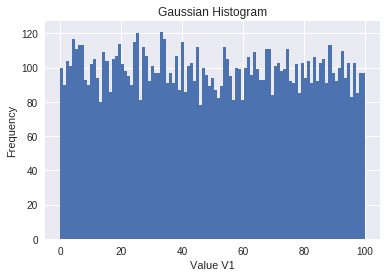

In [25]:
#data_train.v1.value_counts()
%matplotlib inline
plt.hist(data_train.v1,bins=data_train.v1.nunique())
plt.title("Gaussian Histogram")
plt.xlabel("Value V1")
plt.ylabel("Frequency")
plt.legend(loc=2)

In [0]:
# create X and Y matrix from the initial data
def getXYMatrix(X,resultCol):
    features = [col for col in X.columns if col != resultCol]
    return X[features], X[resultCol]

In [42]:
# get X and Y
X, y = getXYMatrix(data_train,'cible')
print (X.shape, y.shape)

((10000, 2), (10000,))


In [43]:
X.head(2)

,v1,v2
0,32,57
1,46,71


In [44]:
y.head(2)

0    121
1    163
Name: cible, dtype: int64

In [0]:
# split the dataset into two datasets, one for training with 0.7 of data and one for test with 0.3 data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [46]:
#model = LinearRegression()
model = RandomForestRegressor(n_estimators=160,n_jobs=-1)
# 1) train the model
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=160, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [47]:
# 2) predict on the test dataset
y_pred = model.predict(X_test)
# show the prediction resultat
print (y_pred)

[ 129.71875  215.575    107.525   ...,  143.575    178.99375  104.025  ]


In [0]:
result = X_test

In [49]:
result['pred'] = y_pred

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
result.shape

(3000, 3)

In [51]:
result.tail(10)

,v1,v2,pred
9543,64,55,173.32500
2759,72,18,107.71875
8294,85,71,226.59375
1586,38,27,91.92500
6666,63,35,132.47500
8014,91,16,122.87500
1074,18,43,78.92500
3063,23,99,143.57500
6487,73,53,178.99375
4705,5,94,104.02500
